# Just an experiment to get more than one output XD

In [2]:
import tensorflow as tf
import pandas as pd
import tensorflow.keras.layers as L
from sklearn.multioutput import MultiOutputRegressor as MOR
from sklearn.model_selection import train_test_split as tts

2024-03-28 12:20:01.280026: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-28 12:20:01.331276: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 12:20:01.331327: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 12:20:01.333771: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-28 12:20:01.340739: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-28 12:20:01.343096: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
data = pd.read_csv('DataSet/dataWnmhc.csv')

In [4]:
data.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
datetimestamp      int64
DateTime          object
dtype: object

In [5]:
X = data.drop(columns=['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'DateTime'])
Y = data[['CO(GT)', 'C6H6(GT)', 'NOx(GT)']]

In [6]:
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.3)
X_train, X_val, Y_train, Y_val = tts(X_train, Y_train, test_size=0.25)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
Y_train_scaled = scaler.fit_transform(Y_train)

X_test_scaled = scaler.fit_transform(X_test)
Y_test_scaled = scaler.fit_transform(Y_test)

X_val_scaled = scaler.fit_transform(X_val)
Y_val_scaled = scaler.fit_transform(Y_val)

In [8]:
from sklearn.linear_model import LinearRegression

regr = MOR(LinearRegression()).fit(X_train_scaled, Y_train_scaled)

In [9]:
y_pred = regr.predict(X_test_scaled)

In [10]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test_scaled, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.08884592770015537


In [11]:
model = tf.keras.Sequential([
    L.Dense(8, activation='sigmoid', input_shape=(X_train.shape[1],)),
    # L.Dropout(0.2),
    L.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    # L.Dropout(0.2),
    L.Dense(32, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    # L.Dropout(0.2),
    L.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    # L.Dropout(0.2),
    L.Dense(8, activation='selu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    # L.Dropout(0.2),
    L.Dense(3)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, Y_train_scaled, epochs=50, batch_size=32, validation_data=(X_val_scaled, Y_val_scaled))

Epoch 1/50
107/107 [==============================] - 1s 4ms/step - loss: 1.0879 - val_loss: 0.6893
Epoch 2/50
107/107 [==============================] - 0s 2ms/step - loss: 0.5739 - val_loss: 0.5058
Epoch 3/50
107/107 [==============================] - 0s 2ms/step - loss: 0.4452 - val_loss: 0.4103
Epoch 4/50
107/107 [==============================] - 0s 2ms/step - loss: 0.3716 - val_loss: 0.3531
Epoch 5/50
107/107 [==============================] - 0s 2ms/step - loss: 0.3251 - val_loss: 0.3185
Epoch 6/50
107/107 [==============================] - 0s 2ms/step - loss: 0.2929 - val_loss: 0.2859
Epoch 7/50
107/107 [==============================] - 0s 2ms/step - loss: 0.2701 - val_loss: 0.2630
Epoch 8/50
107/107 [==============================] - 0s 2ms/step - loss: 0.2510 - val_loss: 0.2479
Epoch 9/50
107/107 [==============================] - 0s 2ms/step - loss: 0.2359 - val_loss: 0.2328
Epoch 10/50
107/107 [==============================] - 0s 2ms/step - loss: 0.2237 - val_loss: 0.2224

In [15]:
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test_scaled, y_pred)
print("Mean Squared Error:", mse)

62/62 [==============================] - 0s 1ms/step
Mean Squared Error: 0.07753598633669218


In [16]:
preddf = pd.DataFrame(scaler.inverse_transform(y_pred))
truedf = pd.DataFrame(Y_test)

In [22]:
preddf = pd.DataFrame(y_pred)
truedf = pd.DataFrame(Y_test_scaled)

In [23]:
import matplotlib.pyplot as plt

Mean Squared Error: 0.07753598633669218


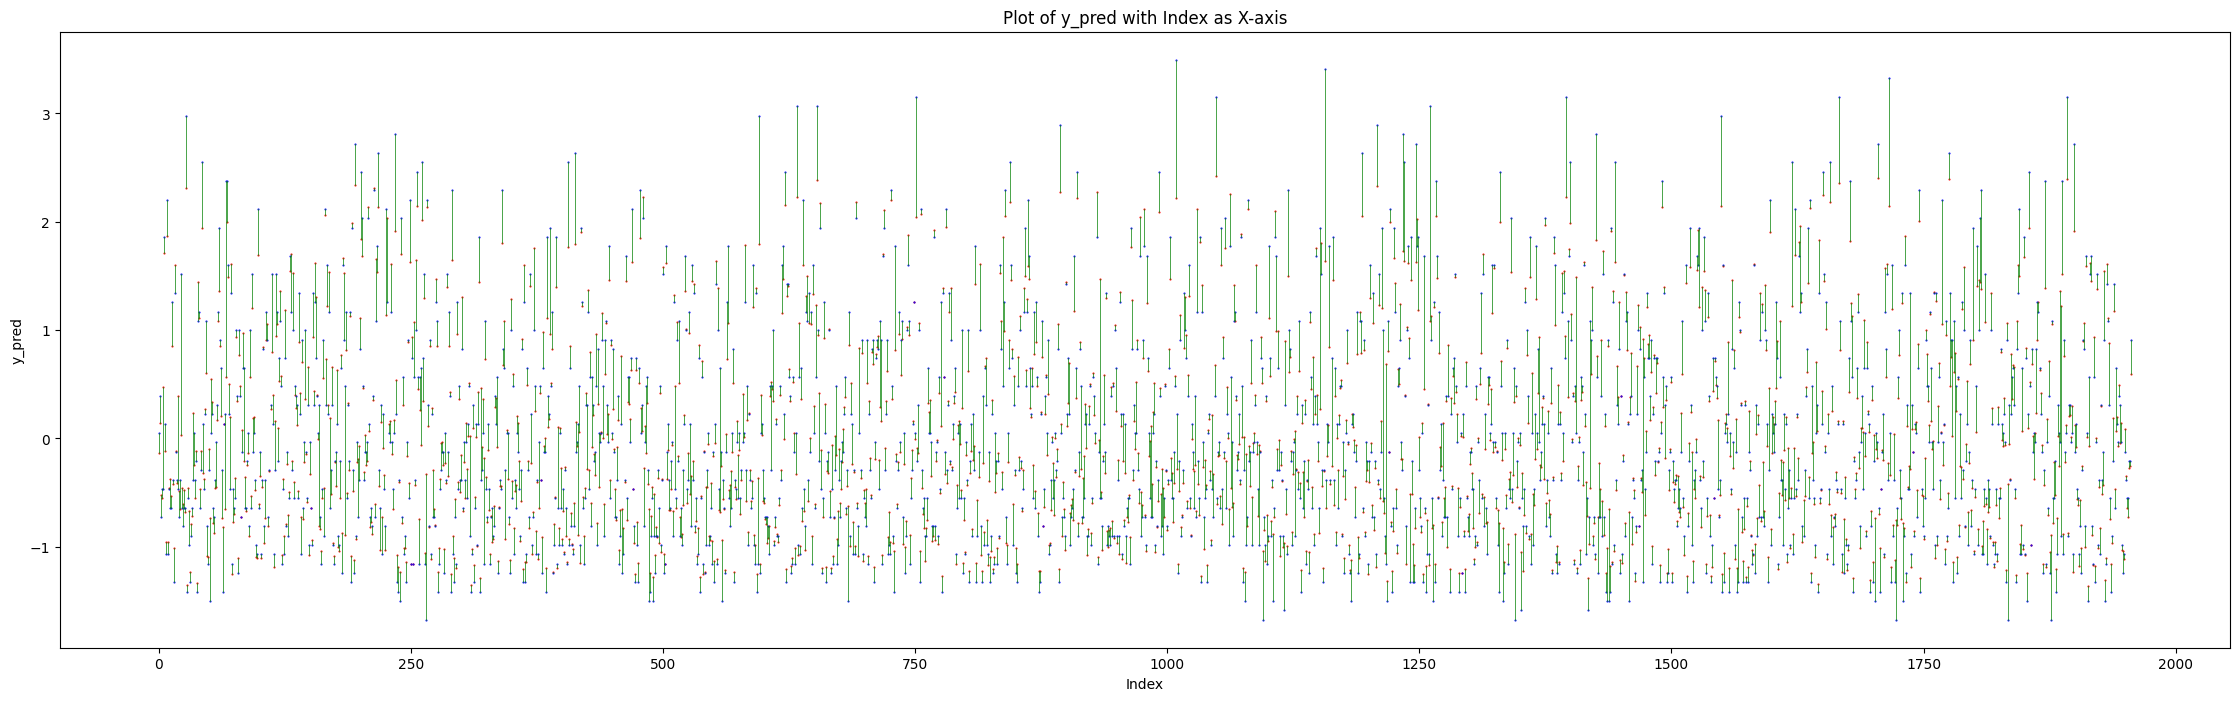

In [24]:
which = 0
mse = mean_squared_error(truedf, preddf)
print("Mean Squared Error:", mse)
plt.figure(figsize=(28, 8))
plt.scatter(range(len(preddf[which])), preddf[which], color='red', marker='.', s=1)
plt.scatter(range(len(preddf[which])), truedf[which], color='blue', marker='.', s=1)
for i in range(len(preddf[which])):
    plt.plot([i, i], [preddf[which][i], truedf[which][i]], color='green', linewidth=0.5)
plt.xlabel('Index')
plt.ylabel('y_pred')
plt.title('Plot of y_pred with Index as X-axis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [130]:
preddf.shape

(1957, 3)